## 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_pharmacy_sales = pd.read_csv("../../../delete/Demo Pharmacy Sales Data.csv")
df_pharmacy_sales

,Date Sold,Med_name,Med_class,Quantity Sold,Price
0,2021-05-07,Clotrimazole Topical Cream (2%),Antifungal,66,86.9
1,2021-08-09,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,15,22.9
2,2021-06-15,Methyltestosterone Tablet (10 mg),Androgen Hormone,5,5.9
3,2021-02-19,Buspirone Tablet (5 mg),Anxiolytic,89,55.7
4,2022-09-24,Hydrocodone/Acetaminophen Tablet (5/325 mg),Opioid Analgesic/Analgesic Combination,79,0.7
...,...,...,...,...,...
999995,2020-11-29,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,34,58.0
999996,2021-03-30,Fenoprofen Tablet (600 mg),Nonsteroidal Anti-Inflammatory Drug,12,98.3
999997,2020-04-17,Doxazosin Tablet (1 mg),Alpha-Blocker,83,10.3
999998,2021-12-08,Flumazenil Injection (0.1 mg/mL),Benzodiazepine Antagonist,1,23.9


기본 정보 보기

In [4]:
df_pharmacy_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Date Sold      1000000 non-null  object 
 1   Med_name       1000000 non-null  object 
 2   Med_class      1000000 non-null  object 
 3   Quantity Sold  1000000 non-null  int64  
 4   Price          1000000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 38.1+ MB


이 중 QUantity Sold랑 Price 만 숫자형인 것을 확인할 수 있음

In [5]:
summary_stats = df_pharmacy_sales[['Quantity Sold','Price']].describe()
summary_stats

,Quantity Sold,Price
count,1000000.000000,1000000.000000
mean,50.524566,50.024411
std,28.847235,28.872706
min,1.000000,0.100000
25%,26.000000,25.000000
50%,51.000000,50.000000
75%,75.000000,75.100000
max,100.000000,100.000000


summary 보면 위와 같음

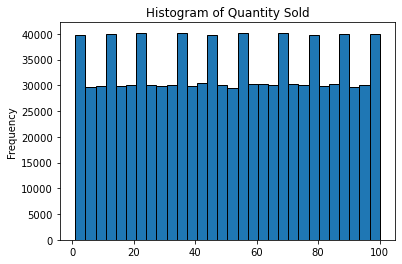

In [8]:
df_pharmacy_sales['Quantity Sold'].plot.hist(bins=30,edgecolor='k')
plt.title("Histogram of Quantity Sold")
plt.show()

bin 을 어떻게 설정하느냐에 따라 약 판매량 데이터를 다르게 볼 수 있을듯

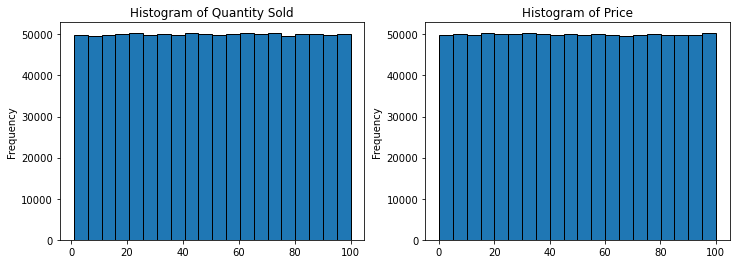

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df_pharmacy_sales['Quantity Sold'].plot.hist(bins=20,edgecolor='k')
plt.title("Histogram of Quantity Sold")

plt.subplot(1,2,2)
df_pharmacy_sales['Price'].plot.hist(bins=20,edgecolor='k')
plt.title("Histogram of Price")

plt.show()

팔린 개수랑 가격이랑 어떻게 범위가 같지..

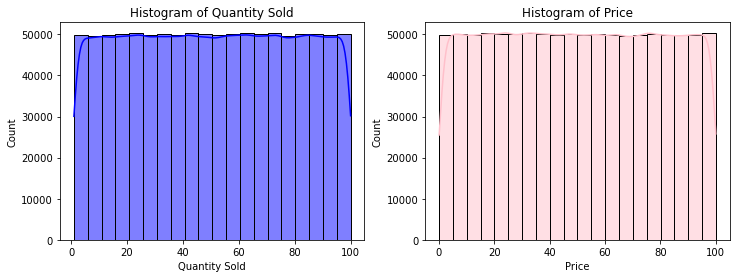

In [13]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df_pharmacy_sales['Quantity Sold'],bins=20,kde=True,color='blue')
plt.title("Histogram of Quantity Sold")

plt.subplot(1,2,2)
sns.histplot(df_pharmacy_sales['Price'],bins=20,kde=True,color='pink')
plt.title("Histogram of Price")

plt.show()

seaborn을 사용해서 데이터를 그려보면 위와 같은데

plot 그리는 방법은 다양하니 참고

## 2

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [19]:
df_pharmacy_sales = pd.read_csv("../../../delete/Demo Pharmacy Sales Data.csv")
df_pharmacy_sales.head()

,Date Sold,Med_name,Med_class,Quantity Sold,Price
0,2021-05-07,Clotrimazole Topical Cream (2%),Antifungal,66,86.9
1,2021-08-09,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,15,22.9
2,2021-06-15,Methyltestosterone Tablet (10 mg),Androgen Hormone,5,5.9
3,2021-02-19,Buspirone Tablet (5 mg),Anxiolytic,89,55.7
4,2022-09-24,Hydrocodone/Acetaminophen Tablet (5/325 mg),Opioid Analgesic/Analgesic Combination,79,0.7


단어 시각화를 위해 WordCloud를 쓸거임

In [23]:
df_pharmacy_sales['Med_name'].value_counts()

Tretinoin Topical Cream (0.025%)                     15027
Ketoconazole Topical Cream (2%)                      11008
Adapalene/Benzoyl Peroxide Topical Gel (0.1/2.5%)    10097
Triamcinolone Topical Ointment (0.1%)                10083
Clobetasol Topical Cream (0.05%)                      9984
                                                     ...  
Guanfacine Tablet (2 mg)                               939
Olopatadine Nasal Spray (665 mcg/spray)                938
Methylphenidate Tablet (10 mg)                         938
Lithium Carbonate Capsule (300 mg)                     920
Clindamycin Topical Lotion (1%)                        917
Name: Med_name, Length: 279, dtype: int64

Med_name의 summary는 위와 같음

In [33]:
len(df_pharmacy_sales.query('Med_name=="Guanfacine Tablet (2 mg)"'))

939

In [34]:
df_pharmacy_sales['Med_class'].value_counts()

 Nonsteroidal Anti-Inflammatory Drug                        82146
 Phosphodiesterase Type 5 Inhibitor                         56294
 Alpha-Blocker                                              52208
 Anticonvulsant                                             49766
 Beta-Blocker                                               40673
                                                            ...  
 Norepinephrine Reuptake Inhibitor                            995
 Melatonin Receptor Agonist                                   983
 Cardiac Glycoside                                            981
 Anticholinergic/Short-Acting Beta-2 Agonist Combination      977
 Mood Stabilizer                                              920
Name: Med_class, Length: 87, dtype: int64

Med_class의 summary는 위와 같음

In [35]:
top_number = 20

In [36]:
top_classes = df_pharmacy_sales['Med_class'].value_counts().nlargest(top_number).index
top_classes

Index([' Nonsteroidal Anti-Inflammatory Drug',
       ' Phosphodiesterase Type 5 Inhibitor', ' Alpha-Blocker',
       ' Anticonvulsant', ' Beta-Blocker', ' Antifungal', ' Corticosteroid',
       ' Benzodiazepine', ' Low-Potency Corticosteroid',
       ' High-Potency Corticosteroid', ' Opioid Analgesic', ' Antibiotic',
       ' Inhaled Corticosteroid', ' 5-Alpha Reductase Inhibitor', ' Analgesic',
       ' Prostaglandin E1 Analog', ' Retinoid', ' Sympathomimetic',
       ' Vasodilator', ' Alpha-2 Agonist'],
      dtype='object')

In [37]:
df_top_med_classes = df_pharmacy_sales[df_pharmacy_sales['Med_class'].isin(top_classes)]
df_top_med_classes

,Date Sold,Med_name,Med_class,Quantity Sold,Price
0,2021-05-07,Clotrimazole Topical Cream (2%),Antifungal,66,86.9
1,2021-08-09,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,15,22.9
6,2018-10-22,Norepinephrine Injection (2 mg/mL),Sympathomimetic,96,80.6
8,2022-05-19,Rofecoxib Tablet (25 mg),Nonsteroidal Anti-Inflammatory Drug,32,21.2
9,2019-07-21,Fluticasone Inhaler (50 mcg/actuation),Inhaled Corticosteroid,71,9.6
...,...,...,...,...,...
999992,2018-10-31,Carbamazepine Tablet (200 mg),Anticonvulsant,92,73.3
999995,2020-11-29,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,34,58.0
999996,2021-03-30,Fenoprofen Tablet (600 mg),Nonsteroidal Anti-Inflammatory Drug,12,98.3
999997,2020-04-17,Doxazosin Tablet (1 mg),Alpha-Blocker,83,10.3


상위 20개만 살펴보고자 할때

In [38]:
df_top_med_classes = df_top_med_classes.groupby('Med_class')['Quantity Sold'].sum().reset_index()
df_top_med_classes

,Med_class,Quantity Sold
0,5-Alpha Reductase Inhibitor,1101549
1,Alpha-2 Agonist,802378
2,Alpha-Blocker,2625280
3,Analgesic,1061008
4,Antibiotic,1259910
5,Anticonvulsant,2514863
6,Antifungal,1819102
7,Benzodiazepine,1705063
8,Beta-Blocker,2062362
9,Corticosteroid,1776749


In [44]:
type(df_top_med_classes.groupby('Med_class')['Quantity Sold'].sum())

pandas.core.series.Series

reset_index하기 전

In [43]:
type(df_top_med_classes)

pandas.core.frame.DataFrame

reset_index 후

In [62]:
df_top_med_classes = df_top_med_classes.sort_values(by='Quantity Sold')
df_top_med_classes

,Med_class,Quantity Sold
1,Alpha-2 Agonist,802378
19,Vasodilator,973025
18,Sympathomimetic,1005189
17,Retinoid,1019449
16,Prostaglandin E1 Analog,1060112
3,Analgesic,1061008
0,5-Alpha Reductase Inhibitor,1101549
11,Inhaled Corticosteroid,1112097
4,Antibiotic,1259910
10,High-Potency Corticosteroid,1509454


## 4

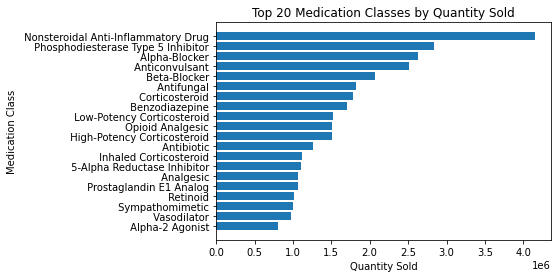

In [63]:
plt.barh(df_top_med_classes['Med_class'],df_top_med_classes['Quantity Sold'])
plt.title(f'Top {top_number} Medication Classes by Quantity Sold')
plt.xlabel("Quantity Sold")
plt.ylabel("Medication Class")
plt.show()

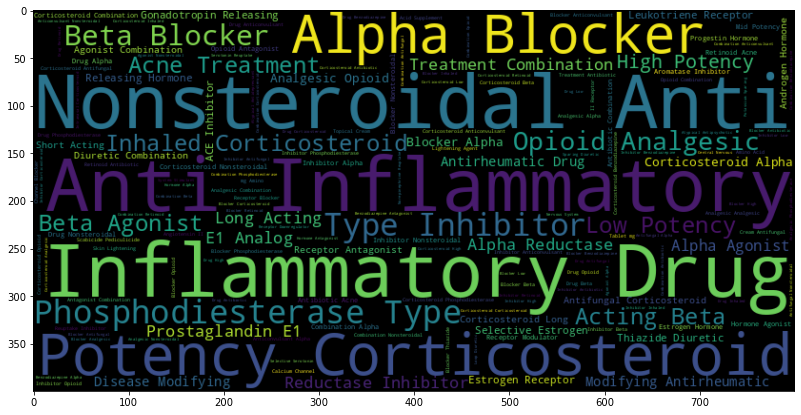

In [64]:
med_classes = df_pharmacy_sales['Med_class'].str.cat(sep='')
wordcloud = WordCloud(width=800,height=400).generate(med_classes)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

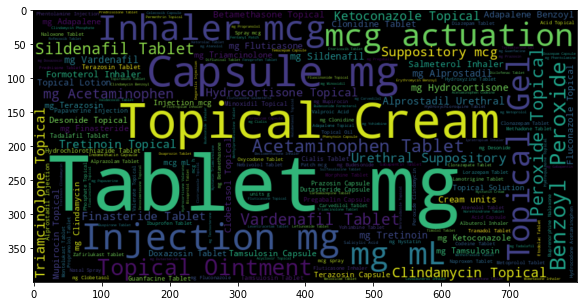

In [65]:
med_names = df_pharmacy_sales['Med_name'].str.cat(sep='')
wordcloud = WordCloud(width=800,height=400).generate(med_names)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import prophet
from prophet import Prophet

In [71]:
df_pharmacy_sales = pd.read_csv("../../../delete/Demo Pharmacy Sales Data.csv")
df_pharmacy_sales

,Date Sold,Med_name,Med_class,Quantity Sold,Price
0,2021-05-07,Clotrimazole Topical Cream (2%),Antifungal,66,86.9
1,2021-08-09,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,15,22.9
2,2021-06-15,Methyltestosterone Tablet (10 mg),Androgen Hormone,5,5.9
3,2021-02-19,Buspirone Tablet (5 mg),Anxiolytic,89,55.7
4,2022-09-24,Hydrocodone/Acetaminophen Tablet (5/325 mg),Opioid Analgesic/Analgesic Combination,79,0.7
...,...,...,...,...,...
999995,2020-11-29,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,34,58.0
999996,2021-03-30,Fenoprofen Tablet (600 mg),Nonsteroidal Anti-Inflammatory Drug,12,98.3
999997,2020-04-17,Doxazosin Tablet (1 mg),Alpha-Blocker,83,10.3
999998,2021-12-08,Flumazenil Injection (0.1 mg/mL),Benzodiazepine Antagonist,1,23.9


In [72]:
df_pharmacy_sales[df_pharmacy_sales['Med_class'].str.contains('Anxiolytic')][['Date Sold', 'Quantity Sold']]

,Date Sold,Quantity Sold
3,2021-02-19,89
122,2022-03-01,82
143,2020-08-11,17
327,2020-12-08,86
518,2019-03-31,70
...,...,...
999594,2019-08-11,42
999711,2020-05-16,71
999772,2019-09-02,63
999883,2019-09-09,38


`Anxiolytic`을 포함하는 문자열만 불러와서 Date Sole, Quantity Sold 변수만 보기

In [73]:
df_prophet = df_pharmacy_sales[df_pharmacy_sales['Med_class'].str.contains('Anxiolytic')][['Date Sold', 'Quantity Sold']]

In [74]:
df_prophet = df_prophet.reset_index()
df_prophet

,index,Date Sold,Quantity Sold
0,3,2021-02-19,89
1,122,2022-03-01,82
2,143,2020-08-11,17
3,327,2020-12-08,86
4,518,2019-03-31,70
...,...,...,...
9999,999594,2019-08-11,42
10000,999711,2020-05-16,71
10001,999772,2019-09-02,63
10002,999883,2019-09-09,38


In [75]:
df_prophet = df_prophet.rename(columns={'Date Sold': 'ds','Quantity Sold':'y'})
df_prophet

,index,ds,y
0,3,2021-02-19,89
1,122,2022-03-01,82
2,143,2020-08-11,17
3,327,2020-12-08,86
4,518,2019-03-31,70
...,...,...,...
9999,999594,2019-08-11,42
10000,999711,2020-05-16,71
10001,999772,2019-09-02,63
10002,999883,2019-09-09,38


In [76]:
type(df_prophet['ds'][0])

str

In [77]:
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

In [78]:
type(df_prophet['ds'][0])

pandas._libs.tslibs.timestamps.Timestamp

문자형이었던 데이터 타입을 판다스 내부 타임스템프형으로 바꿔줌

In [79]:
model = Prophet()

In [80]:
model.fit(df_prophet)

21:18:56 - cmdstanpy - INFO - Chain [1] start processing
21:18:56 - cmdstanpy - INFO - Chain [1] done processing


In [81]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

365일 날짜를 생성해서 분석 수행하도록 `periods`를 365로 넣음

In [84]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-10-20,50.088200,12.457751,86.071166,50.088200,50.088200,-0.101479,-0.101479,-0.101479,-0.559619,-0.559619,-0.559619,0.458139,0.458139,0.458139,0.0,0.0,0.0,49.986721
1,2018-10-21,50.089255,12.637593,84.826632,50.089255,50.089255,-1.108192,-1.108192,-1.108192,-1.314963,-1.314963,-1.314963,0.206771,0.206771,0.206771,0.0,0.0,0.0,48.981063
2,2018-10-22,50.090309,14.975067,86.555339,50.090309,50.090309,0.855300,0.855300,0.855300,0.904402,0.904402,0.904402,-0.049102,-0.049102,-0.049102,0.0,0.0,0.0,50.945609
3,2018-10-23,50.091364,11.951660,87.639434,50.091364,50.091364,0.347593,0.347593,0.347593,0.651931,0.651931,0.651931,-0.304338,-0.304338,-0.304338,0.0,0.0,0.0,50.438957
4,2018-10-24,50.092418,14.286608,83.483818,50.092418,50.092418,-0.474225,-0.474225,-0.474225,0.079648,0.079648,0.079648,-0.553873,-0.553873,-0.553873,0.0,0.0,0.0,49.618193


In [85]:
type(forecast)

pandas.core.frame.DataFrame

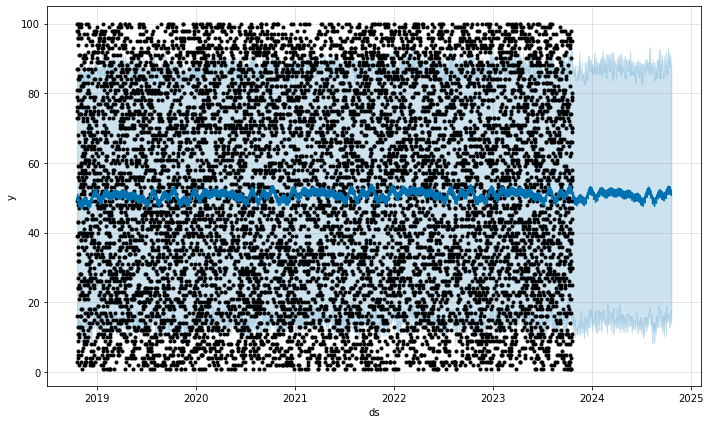

In [82]:
fig = model.plot(forecast)
plt.show()

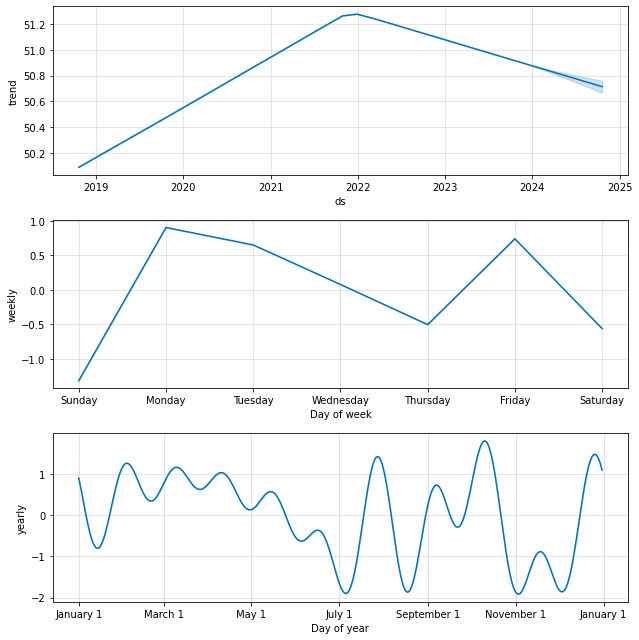

In [86]:
fig = model.plot_components(forecast)
plt.show()

1. trend로 장기적인 경향을 시각화

2. Weekly Seasonality (주간 계절성) 요일별 주기적인 패턴 확인

3. Yearly Seasonality (연간 계절성) 월 또는 계절 단위의 반복되는 패턴을 시각화